*1007 파이썬 머신러닝 완벽 가이드 p.210~p.244*

*(ch4. 3~6)*

# **CHAPTER 04. 분류**



> **03. 앙상블 학습**


**[ 앙상블 학습 개요 ]**

-앙상블 학습(Ensemble Learning): 여러 개의 분류기 (Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법

-앙상블 학습의 목표: 다양한 분류기의 예측 결과를 결합함으로써 단일 분류기보다 신뢰성이 높은 예측값을 얻는 것

ex. 랜덤 포레스트, 그래디언트 부스팅 알고리즘, XGboost, LightGBM

-

앙상블 학습의 유형: 보팅(Voting), 배깅(Bagging), 부스팅(Boosting)

**보팅**과 **배깅**: 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식

**보팅**의 경우 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합, **배깅**의 경우 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅을 수행.(like 랜덤 포레스트)

-**부트스트래핑**(Bootstrapping) 분할 방식: 개별 Classifier에게 데이터를 샘플링해서 추출하는 방식.

-개별 분류기가 부트스트래핑 방식으로 샘플링된 데이터 세트에 대해서 학습을 통해 개별적인 예측을 수행한 결과를 보팅을 통해서 최종 예측 결과를 선정하는 방식이 배깅 앙상블 방식!!

-교차 검증과 다르게 배깅 방식은 **중첩을 허용** -> 10000개의 데이터를 10개의 분류기가 배깅 방식으로 나누더라도 각 1000개의 데이터 내에는 중복된 데이터가 있음.

-**부스팅**: 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서 올바르게 예측할 수 있도록 다음 분류기에게는 가중치(weight)를 부여하면서 학습과 예측 진행

대표적인 부스팅 모듈: 그래디언트 부스트, XGBoost(eXtra Gradient Boost), LightGBM(Light Gradient Boost)

-**스태킹** 여러 가지 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어서 다른 모델(메타 모델)로 재학습시켜 결과를 예측하는 방법



---

**[ 보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting) ]**

-**하드 보팅**: (Classification)는 다수결 원칙과 비슷, 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정하는 것.

-**소프트 보팅**: 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균내서 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정.

*일반적으로 소프트 보팅이 보팅 방법으로 적용됨.



---



**[ 보팅 분류기(Voting Classifier) ]**

사이킷런은 보팅 방식의 앙상블을 구현한 VotingClassifier 클래스를 제공.

In [17]:
# 보팅 방식의 앙상블을 이용해 위스콘신 유방암 데이터 세트를 예측 분석
# 로지스틱 회귀와 KNN을 기반으로 보팅 분류기 만들기

import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


VotingClassifier 클래스 주요 생성 인자: estimators / voting 값

-estimators: 리스트 값으로 보팅에 사용될 여러 개의 Classifier 객체들을 튜플 형식으로 입력받음.
-voting: 'hard': 하드 보팅, 'soft' 소프트 보팅 방식 적용(디폴트는 hard)



In [18]:
# 개별 모델은 로지스틱 회귀와 KNN임.
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft' )
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9561
LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


**보팅과 스태킹 등은 서로 다른 알고리즘**을 기반으로, **배깅과 부스팅은 대부분 결정 트리 알고리즘**을 기반으로 함.

**결정 트리 알고리즘**은 쉽고 직관적인 분류 기준을 가지고 있지만 과적합이 발생해 실제 테스트 데이터에서 예측 성능이 떨어지는 현상이 발생하기 쉬움.

하지만 **앙상블 학습**에서는 이 같은 결정 트리 알고리즘의 단점을 수십~수천 개의 매우 많은 분류기를 결합해 다양한 상황을 학습하게 함으로써 극복하고 있음.

-> 결정 트리 알고리즘의 장점은 그대로 취하고 단점은 보완하면서 편향-분산 트레이드오프의 효과를 극대화할 수 있음.



> **04. 랜덤 포레스트**


**[ 랜덤 포레스트의 개요 및 실습 ]**

**배깅(bagging)**은 앞에서 소개한 보팅과는 다르게, **같은 알고리즘**으로 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘.

배깅의 대표적인 알고리즘은 **랜덤 포레스트**로, 앙상블 알고리즘 중 비교적 빠른 수행 속도를 가지고 있으며, 다양한 영역에서 높은 예측 성능을 보이고 있음. 랜덤 포레스트의 기반 알고리즘은 **결정 트리**로서, 결정 트리의 쉽고 직관적인 장점을 그대로 가지고 있음.
(랜덤 포레스트뿐만 아니라 부스팅 기반의 다양한 앙상블 알고리즘 역시 대부분 결정 트리 알고리즘을 기반 알고리즘으로 채택하고 있음).

랜덤 포레스트는 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 하게 됨.

-

랜덤 포레스트는 개별적인 분류기의 기반 알고리즘은 결정 트리이지만, 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 **중첩**되게 샘플링된 데이터 세트.

**부트스트래핑(bootstrapping)**: 여러 개의 데이터 세트를 중첩되게 분리하는 것.


사이킷런은 RandomForestClassifier 클래스를 통해 랜덤포레스트 기반의 분류를 지원함.


In [19]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving features.txt to features.txt


In [20]:
feature_name_df = pd.read_csv('features.txt', sep='\s+',header=None, names=['column_index', 'column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [23]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

In [29]:
from google.colab import drive
drive.mount('/content/drive')

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] >0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

def get_human_dataset():

    # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv('features.txt', sep='\s+',
                                  header = None, names = ['column_index', 'column_name'])

    # 중복된 피처명으 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

    # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
    X_train = pd.read_csv('/content/drive/MyDrive/ESAA/human_activity/train/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('/content/drive/MyDrive/ESAA/human_activity/test/X_test.txt', sep='\s+', names=feature_name)

    # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
    y_train = pd.read_csv('/content/drive/MyDrive/ESAA/human_activity/train/y_train.txt', header=None, names=['action'])
    y_test = pd.read_csv('/content/drive/MyDrive/ESAA/human_activity/test/y_test.txt', header=None, names=['action'])

    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# 앞의 사용자 행동 인식 데이터 세트를 RandomForestClassifier를 이용해 예측
# 재수행할 때마다 동일한 예측 결과를 출력하기 위해 RandomForestClassifer의 random_state를 0으로 설정

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset( )를 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()
# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0, max_depth=8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print( '랜덤 포레스트 정확도: {0:.4f}' .format(accuracy))

랜덤 포레스트 정확도: 0.9196




---

**[ 랜덤 포레스트 하이퍼 파라미터 및 튜닝 ]**

트리 기반의 앙상블 알고리즘의 단점: 하이퍼 파라미터가 너무 많고, 그로 인해서 튜닝을 위한 시간이 많이 소모됨, 튜닝 후 예측 성능이 크게 향상되는 경우가 많지 않음.

+배깅, 부스팅, 학습, 정규화 등을 위한 하이퍼 파라미터까지 추가되므로 일반적으로 다른 ML 알고리즘에 비해 많음. 그나마 랜덤 포레스트가 적은 편에 속하는데, 결정 트리에서 사용되는 하이퍼 파라미터와 같은 파라미터가 대부분이기 때문.

-

- n_estimators: 랜덤 포레스트에서 결정 트리의 개수. 디폴트는 10개. 많이 설정할수록 좋은 성능을 기대할 수 있지만 계속 증가시킨다고 성능이 무조건 향상되는 것은 아니며, 늘릴수록 학습 수행 시간 증가.
- max_features: 결정 트리에 사용된 max_features 파라미터와 같음. 하지만 RandomForestClassifier의 디폴트 max_features는 'None'이 아닌 'auto'(sqrt). 따라서 랜덤 포레스트의 트리를 분할하는 피처를 참조할 때 전체 피처가 아니라 루트(전체 피처 개수)만큼 참조함.(전체 피처가 16개라면 분할을 위해 4개 참조)
- max_depth나 min_samples_leat, min_samples_split와 같이 결정 트리에서 과적합을 개선하기 위해 사용되는 파라미터가 랜덤 포레스트에도 똑같이 적용될 수 있음.

In [32]:
# GridSearchCV를 이용해 랜덤 포레스트의 하이퍼 파라미터 튜닝
# 튜닝 시간을 절약하기 위해 n_estimators는 100으로, CV를 2로만 설정

from sklearn.model_selection import GridSearchCV
params = {
    'max_depth': [8, 16, 24],
    'min_samples_leaf': [1, 6, 12],
    'min_samples_split': [2, 8, 16]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2}
최고 예측 정확도: 0.9165


-> max_depth: 16, min_samples_leaf: 6, min_samples_split: 2일 때 2개의 CV 세트에서 약 91.65%의 평균 정확도.

In [35]:
# 추출된 최적 하이퍼 파라미터로 다시 RandomForest Classifier를 학습시킨 뒤에 이번에는 별도의 테스트 데이터 세트에서 예측 성능 측정
from sklearn.ensemble import RandomForestClassifier
rf_clf1 = RandomForestClassifier(n_estimators=100, min_samples_leaf=6, max_depth=16, min_samples_split=2, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9260


-> 별도의 테스트 데이터 세트에서 수행한 예측 정확도 수치: 약 92.60%

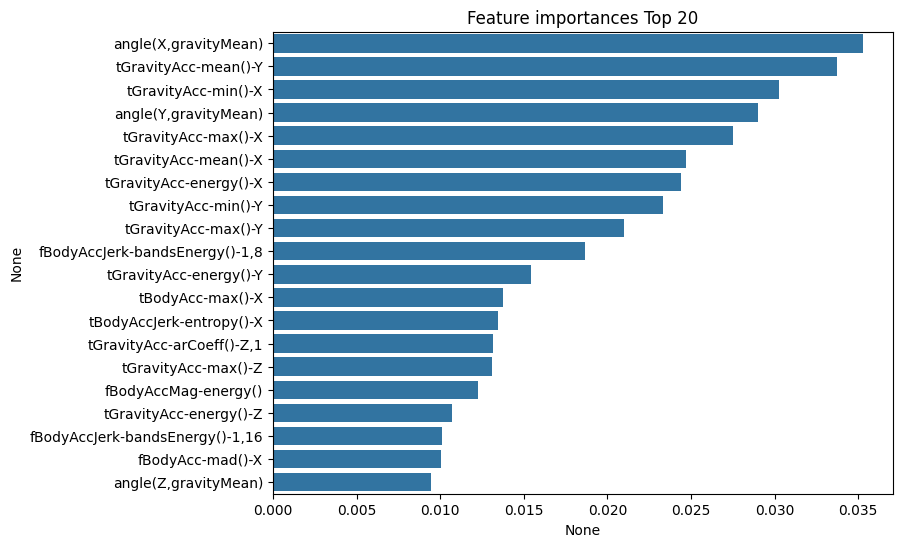

In [36]:
# RandomForestClassifier도 DecisionTreeClassifier와 똑같이 feature_importances_ 를 이용해 피처의 중요도를 알 수 있음.
# 피처 중요도를 막대그래프로 시각화

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()



> **05. GBM(Gradient Boosting Machine)**

**[ GBM의 개요 및 실습 ]**

**부스팅 알고리즘**

: 여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측하며 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선하며 학습하는 방식. 부스팅의 대표적인 구현은 **AdaBoost(Adaptive boosting)**와 **그래디언트 부스트**가 있음.

-

에이다 부스트(AdaBoost): 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘

GBM(Gradient Boost Machine): 가중치 업데이트를 경사 하강법(Gradient Descent)을 이용하는 것이 큰 차이. 오류 값(실제 값 - 예측값)을 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트하는 것.

-

사이킷런은 GBM 기반의 분류를 위해서 GradientBoostingClassifier 클래스를 제공

In [42]:
# 사이킷런의 GBM을 이용해 사용자 행동 데이터 세트를 예측 분류

from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

In [43]:
# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

In [44]:
gb_clf = GradientBoostingClassifier(random_state=0)

In [84]:
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

GBM 정확도: 0.9561
GBM 수행 시간: 1303.8 초 


기본 하이퍼 파라미터만으로 93.89%의 예측 정확도로 앞의 랜덤 포레스트보다 나은 예측 성능을 나타냄.

*일반적으로 GBM이 랜덤 포레스트보다는 예측 성능이 조금 뛰어난 경우가 많음. 그러나 수행 시간이 오래 걸리고, 하이퍼 파라미터 튜닝 노력도 더 필요.

-

사이킷런의 **GradientBoostingClassifier**:

 약한 학습기의 순차적인 예측 오류 보정을 통해 학습을 수행하므로 멀티 CPU 코어 시스템을 사용하더라도 병렬
처리가 지원되지 않아서 대용량 데이터의 경우 학습에 매우 많은 시간이 필요.


**랜덤 포레스트**:

상대적으로 빠른 수행 시간을 보장해주기 때문에 더 쉽게 예측 결과를 도출.



---

**[ GBM 하이퍼 파라미터 소개 ]**

- loss: 경사 하강법에서 사용할 비용 함수를 지정. 디폴트 'deviance'
- learning_rate: GBM이 학습을 진행할 때마다 적용하는 학습률. Weak learner가 순차적으로 오류값을 보정하는 데 적용하는 계수로, 0~1 사이의 값을 지정할 수 있으며 기본값은 0.1 이다.\
너무 작은 값을 적용하면 수행 시간이 오래 걸리고, 모든 weak learner의 반복이 완료돼도 최소 오류값을 찾지 못할 수 있음.\
반대로 너무 큰 값을 적용하면 최소 오류 값을 찾지 못하고 그냥 지나쳐 버려 예측 성능이 떨어질 가능성이 높아지지만, 빠른 수행이 가능.\
-> leaming_rate는 n_estimators와 상호 보완적으로 조합해 사용. learning_rate를 작게 하고 n_estimators를 크게 하면 더 이상 성능이 좋아지지 않는 한계점까지는 예측 성능이 조금씩 좋아질 수 있으나, 수행 시간이 너무 오래 걸리는 단점이 있으며, 예측 성능 역시 현격히 좋아지지는 않음.
- n_estimators: weak learner의 개수. weak learner가 순차적으로 오류를 보정하므로 개수가 많을수록 예측 성능이 일정 수준까지는 좋아질 수 있으나 개수가 많을수록 수행 시간이 오래 걸림. 디폴트는 100
- subsample: weak learner가 학습에 사용하는 데이터의 샘플링 비율. 디폴트는 1이며, 이는 전체 학습 데이터를 기반으로 학습한다는 의미(0.5이면 학습 데이터의 50%). 과적합이 염려되는 경우 subsample을 1보다 작은 값으
로 설정함.



> **06. XGBoost(eXtra Gradient Boost)**

**[ XGBoost 개요 ]**
-트리 기반의 앙상블 학습
-GBM에 기반하고 있지만, GBM의 단점인 느린 수행 시간 및 과적합 규제(Regularization) 부재 등의 문제를 해결
-병렬 CPU 환경에서 병렬 학습이 가능해 기존 GBM보다 빠르게 학습

-

주요 장점: 뛰어난 예측 성능 / GBM 대비 빠른 수행 시간 / 과적합 규제(Regularization) / Tree pruning(나무가지치기) / 자체 내장된 교차 검증
/ 결손값 자체 처리

-

초기의 독자적인 XGBoost 프레임워크 기반의 XGBoost를 **파이썬 래퍼 XGBoost 모
듈**, 사이킷런과 연동되는 모듈을 **사이킷런 래퍼 XGBoost 모듈**이라고 지칭.



---

**[ XGBoost 설치하기 ]**



In [82]:
import xgboost as xgb

**파이썬 래퍼 XGBoost 하이퍼 파라미터**

: XGBoost는 GBM과 유사한 하이퍼 파라미터를 가지고 있으며, 여기에 **조기 중단**(early stopping), **과적합**을 규제하기 위한 하이퍼 파라미터 등이 추가됐습니다.

-

<파이썬 래퍼 XGBoost 하이퍼 파라미터>

- **일반 파라미터**: 일반적으로 실행 시 스레드의 개수나 silent 모드 등의 선택을 위한 파라미터로서 디폴트 파라미터 값을 바꾸는 경우는 거의 없음.
    * booster: gbtree(tree based model) 또는 gblinear(linear model) 선택. 디폴트는 gbtree.
    * silent: 디폴트는 0이며, 출력 메시지를 나타내고 싶지 않을 경우 1로 설정.
    * nthread: CPU의 실행 스레드 개수를 조정하며, 디폴트는 CPU의 전체 스레드를 다 사용하는 것. 멀티 코어/스레드 CPU 시스템에서 전체 CPU를 사용하지 않고 일부 CPU만 사용해 ML 애플리케이션을 구동하는 경우에 변경함.

- **부스터 파라미터**: 트리 최적화, 부스팅, regularization 등과 관련 파라미터 등을 지칭.
    * eta: GBM의 학습률(learning rate)과 같은 파라미터로, 0에서 1 사이의 값을 지정하며 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값. 파이썬 래퍼 기반의 xgboost를 이용할 경우 디폴트는 0.3. 사이킷런 래퍼 클래스를 이용할 경우 eta는 learning_rate 파라미터로 대체되며, 디폴트는 0.1. 보통은 0.01~0.2 사이의 값을 선호.
    * num_boost_rounds: GBM의 n_estimators와 같은 파라미터.
    * min_child_weight[default=1]: 트리에서 추가적으로 가지를 나눌지를 결정하기 위해 필요한 데이터들의 weight 총합. min_child_weight이 클수록 분할을 자제하며, 과적합을 조절하기 위해 사용됨.
    * gamma [defalt=0, alias: min_split_loss]: 트리의 리프 노드를 추가적으로 나눌지를 결정할 최소 손실 감소 값. 해당 값보다 큰 손실(loss)이 감소된 경우에 리프 노드를 분리함. 값이 클수록 과적합 감소 효과가 있음.
    * max_depth[default=6]: 트리 기반 알고리즘의 max_depth와 같음. 0을 지정하면 깊이에 제한이 없음. Max_depth가 높으면 특정 피처 조건에 특화되어 룰 조건이 만들어지므로 과적합 가능성이 높아지며 보통은 3~10 사이의 값을 적용.
    * sub_sample[default=1]: GBM의 subsample과 동일. 트리가 커져서 과적합되는 것을 제어하기 위해 데이터를 샘플링하는 비율 지정. sub_sample=0.5로 지정하면 전체 데이터의 절반을 트리를 생성하는 데 사용. 0에서 1 사이의 값이 가능하나 일반적으로 0.5~1 사이의 값을 사용.
    * colsample_bytree[default=1]: GBM의 max_features와 유사. 트리 생성에 필요한 피처(칼럼)를 임의로 샘플링하는 데 사용되며, 매우 많은 피처가 있는 경우 과적합을 조정하는 데 적용함.
    * lambda [default=1, alias： reg_lambda]: L2 Regularization 적용값으로, 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있음.
    *  alpha [default=0, alias: reg_alpha]: L1 Regularization 적용값으로, 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있음.
    * scale_pos_weight [default=1]: 특정 값으로 치우친 비대칭한 클래스로 구성된 데이터 세트의 균형을 유지하기 위한 파라미터.

-  **학습 태스크 파라미터**: 학습 수행 시의 객체 함수, 평가를 위한 지표 등을 설정하는 파라미터.
    * objective: 최솟값을 가져야 할 손실 함수. XGBoost는 많은 유형의 손실함수를 사용할 수 있으며, 주로 사용되는 손실함수는 이진 분류인지 다중 분류인지에 따라 달라짐.
    * binary:logistic: 이진 분류일 때 적용
    * multi:softmax 다중 분류일 때 적용, 손실함수가 multi:softmax일 경우에는 레이블 클래스의 개수인 num_class파라미터를 지정해야함.
    * multi:softprob: multi:softmax와 유사하나 개별 레이블 클래스의 해당되는 예측 확률을 반환
    * eval_metric: 검증에 사용되는 함수를 정의함. 기본값은 회귀인 경우는 rmse, 분류일 경우에는 error

*대부분의 하이퍼 파라미터는 Booster 파라미터에 속함.



---

<과적합 문제가 심각할 때>
- eta 값을 낮추고(0.01 ~ 0.1). num_round(또는 n_estimators) 높이기
- max_depth 값을 낮추기
- min_child_weight 값 높이기
- gamma 값 높이기
- subsample과 colsample_bytree 조정 (트리가 너무 복잡하게 생성되는 것을 막아 과적합 문제에 도움이 될수있음)

---

*XGBoost, 그리고 뒤에서 소개할 LightGBM은 모두 조기 중단 기능이 있어서 n_estimators에 지정한 부스팅 반복 횟수에 도달하지 않더라도 예측 오류가 더 이상 개선되지 않으면 반복을 끝까지 수행하지 않고 중지해 수행 시간을 개선!

In [50]:
# XGBoost의 버전 확인
import xgboost
print(xgboost.__version__)

2.1.1




---

**[ 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측 ]**


위스콘신 유방암 데이터 세트: 종양의 크기, 모양 등의 다양한 속성값을 기반으로 악성 종양(malignant)인지 양성 종양(benign)인지를 분류한 데이터 세트

In [51]:
# xgboost 모듈을 로딩하고 xgb로 명명
import xgboost as xgb

from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
features= dataset.data
labels = dataset.target

cancer_df = pd.DataFrame(data=features, columns=dataset.feature_names)
cancer_df['target']= labels
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


=> 타깃 레이블 값의 종류는 악성인 'malignant'가 0, 양성인 'benign'이 1.

In [52]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


=> 1 값인 양성 benign이 357개, 0 값인 악성 malignant가 212개로 구성

In [53]:
# cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
# 맨 마지막 칼럼이 Label임. Feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1 슬라이싱으로 추출.
X_features = cancer_df.iloc[:, :-1 ]
y_label = cancer_df.iloc[:, -1 ]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156 )

# 위에서 만든 X.train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train, test_size=0.1, random_state=156 )
print(X_train.shape , X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


=> 전체 569개의 데이터 세트에서 최종 학습용 409개, 검증용 46개, 테스트용 114개가 추출.

---

파이썬 래퍼 XGBoost: XGBoost만의 전용 데이터 객체인 DMatrix 사용.

때문에 Numpy 또는 Pandas를 모두 DMatrix로 생성하여 모델에 입력.

DMatrix의 주요 입력 파라미터: data(피처 데이터 세트), label(분류의 경우에는
레이블 데이터 세트, 회귀의 경우는 숫자형인 종속값 데이터 세트)

In [54]:
# 만약 구버전 XGBoost에서 DataFrame으로 DMatrix 생성이 안 될 경우 X_train.values로 넘파이 변환.
# 학습, 검증, 테스트용 DMatrix를 생성.
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb. DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [55]:
# XGBoost의 하이퍼 파라미터 설정
params = { 'max.depth':3,
          'eta': 0.05,
          'objective':'binary:logistic',
          'eval_metric':'logloss'
}
num_rounds = 400


*조기 중단은 xgboost의 train()함수에 early_stopping_rounds 파라미터를 입력
*early_stopping_rounds 파라미터를 설정해 조기 중단을 수행하기 위해서는 반드시 평가용 데이터 세트 지정과 eval_metric을 함께 설정해야 함.

In [56]:
# 학습 데이터 셋은 'train' 또는 평가 데이터 셋은 'eval' 로 명기
eval_list = [(dtr,'train'),(dval,'eval')] # 또는 eval_list = [(dval/eval')] 만 명기해도 무방.

# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params , dtrain=dtr , num_boost_round=num_rounds , \
                      early_stopping_rounds=50, evals=eval_list )

[0]	train-logloss:0.62395	eval-logloss:0.62717
[1]	train-logloss:0.58508	eval-logloss:0.59840
[2]	train-logloss:0.54982	eval-logloss:0.57318
[3]	train-logloss:0.51753	eval-logloss:0.55059
[4]	train-logloss:0.48811	eval-logloss:0.52872
[5]	train-logloss:0.46090	eval-logloss:0.50856
[6]	train-logloss:0.43506	eval-logloss:0.48961
[7]	train-logloss:0.41181	eval-logloss:0.47329
[8]	train-logloss:0.39031	eval-logloss:0.45827
[9]	train-logloss:0.37038	eval-logloss:0.44360
[10]	train-logloss:0.35185	eval-logloss:0.43076
[11]	train-logloss:0.33394	eval-logloss:0.41824
[12]	train-logloss:0.31784	eval-logloss:0.40697
[13]	train-logloss:0.30265	eval-logloss:0.39724
[14]	train-logloss:0.28798	eval-logloss:0.38717
[15]	train-logloss:0.27480	eval-logloss:0.37833
[16]	train-logloss:0.26231	eval-logloss:0.37060
[17]	train-logloss:0.25046	eval-logloss:0.36290
[18]	train-logloss:0.23927	eval-logloss:0.35570
[19]	train-logloss:0.22845	eval-logloss:0.34831
[20]	train-logloss:0.21820	eval-logloss:0.34105
[2

=> train( )으로 학습을 수행하면서 반복 시마다 train-logloss와 eval-logloss가 지속적으로 감소. 하지만 num_boost_round를 400회로 설정했음에도 학습은 176번째에서 완료.

126번째 반복에서 eval-logloss로 표시되는 검증 데이터에 대한 logloss값이 0.25587로 가장 낮고, 이후 126번에서 176번까지 early_stopping_rounds로 지정된 50회 동안 logloss 값은 이보다 향상되지 않았기 때문에 더 이상 반복하지 않고 멈춘 것!



---

데이터 세트에 예측을 수행.

파이썬 래퍼 XGBoost는 train( ) 함수를 호출해 학습이 완료된 모델 객체를 반환하게 되는데, 이 모델 객체는 예측을 위해 predict() 메서드 이용.

한 가지 유의할 점은 사이킷런의 predict() 메서드는 예측 결과 클래스 값(즉, 0, 1)을 반환, xgboost의 predict()는 예측 결괏값이 아닌 예측 결과를 추정할 수 있는 확률 값을 반환.

In [57]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5보다 크면 1 , 그렇지 않으면 0으로 예측값 결정하여 List 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10])

predict( ) 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨
[0.934 0.004 0.765 0.102 0.98  0.999 0.999 0.998 0.997 0.002]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [60]:
# 3장 평가에서 생성한 get_clf_eval() 함수를 적용해 XGBoost 모델의 예측 성능을 평가해

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)

    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, \
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

get_clf_eval(y_test , preds, pred_probs)

오차 행렬
[[35  2]
 [ 2 75]]
정확도: 0.9649, 정밀도: 0.9740, 재현율: 0.9740,     F1: 0.9740, AUC:0.9947


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

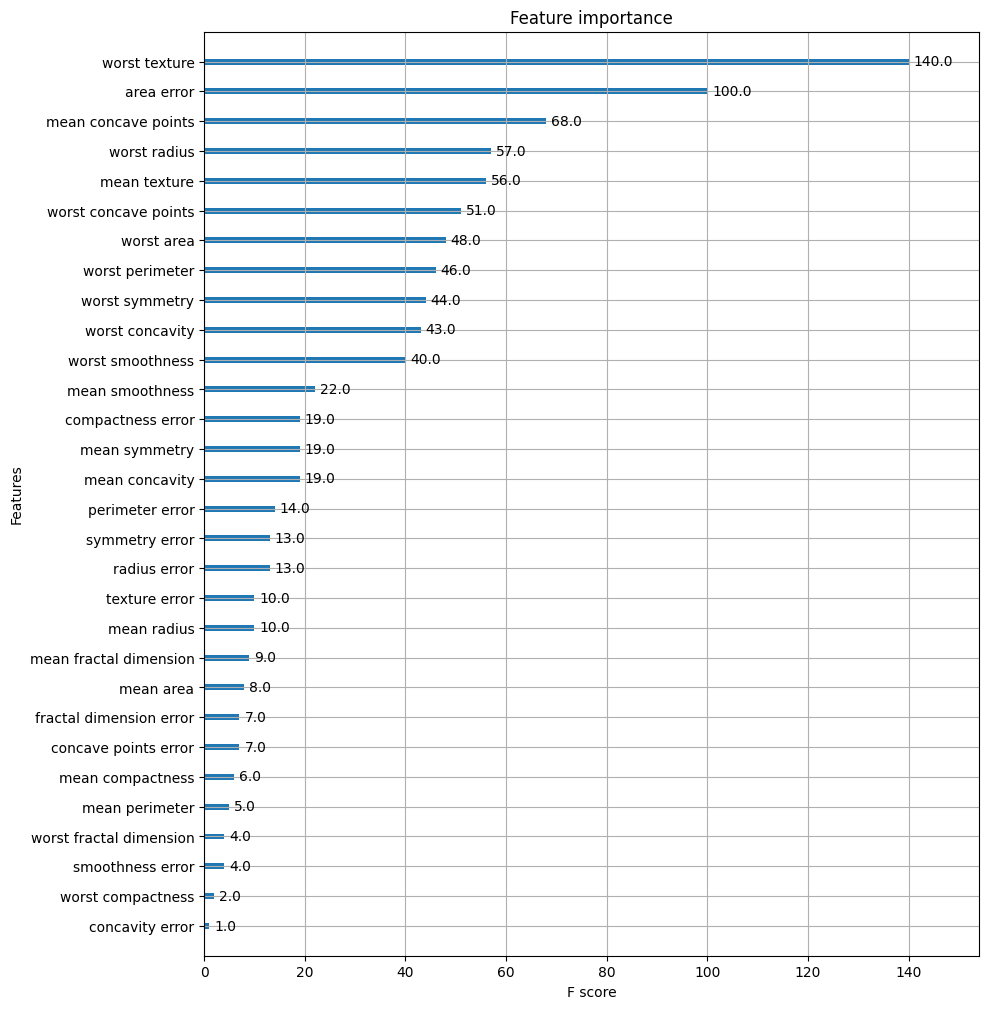

In [65]:
# xgboost 패키지에 내장된 시각화 기능을 수행
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

---

파이썬 래퍼 XGBoost는 사이킷런의 GridSearchCV와 유사하게 데이터 세트에 대한 교차 검증 수행 후 최적 파라미터를 구할 수 있는 방법을 cv() API로 제공.

- params (dict): 부스터 파라미터
- dtrain (DMatrix): 학습 데이터
- num_boost_round (int): 부스팅 반복 횟수
- nfold (int): CV 폴드 개수.
- stratified (bool): CV 수행 시 층화 표본 추출(stratified sampling) 수행 여부
- metrics (string or list of strings):CV 수행 시 모니터링할 성능 평가지표
- early_stopping_rounds (int) : 조기 중단을 활성화시킴. 반복 횟수 지정

*xgb.cv의 반환값은 DataFrame 형태

---

**[ 사이킷런 래퍼 XGBoost의 개요 및 적용 ]**

사이킷런을 위한 래퍼 XGBoost는 크게 분류를 위한 래퍼 클래스인 XGBClassifier, 회귀를 위한 래퍼 클래스인 XGBRegressor.

XGBClassifier는 기존 사이킷런에서 일반적으로 사용하는 하이퍼 파라미터와 호
환성을 유지하기 위해 기존의 xgboost 모듈에서 사용하던 네이티브 하이퍼 파라미터 몇 개를 다음과 같이 변경함.

- eta —> learning_rate
- sub_sample —> subsample
- lambda —> re_lambda
-  alpha —> reg_alpha

In [66]:
# 학습 데이터는 검증 데이터로 분할되기 이전인 X_train과 y_train
# 테스트 데이터는 그대로 X_test와 y_test를 사용

# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

# Warning 메시지를 없애기 위해 eval.metric 값을 XGBClassifier 생성 인자로 입력.
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, eval_metric='logloss')
xgb_wrapper.fit(X_train, y_train, verbose=True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [67]:
get_clf_eval(y_test , w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,     F1: 0.9806, AUC:0.9954


---

<조기 중단 관련 파라미터>

- early_stopping_rounds 평가 지표가 향상될 수 있는 반복 횟수를 정의
- eval_metric 조기 중단을 위한 평가 지표
- eval_set 성능 평가를 수행할 데이터 세트

[(X_tr,y_tr), (X_val, y_val)]와 같이 지정하면 맨 앞의 튜플이 학습용 데이터, 뒤의 튜플이 검증용 데이터로 자동 인식됨.

In [73]:
from xgboost import XGBClassifier
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, early_stopping_rounds=50, eval_metric='logloss')
evals=[(X_tr, y_tr),(X_val,y_val)]
xgb_wrapper.fit(X_tr, y_tr, eval_set=evals, verbose=True)

ws50_preds = xgb_wrapper.predict(X_test)
ws50_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.62480	validation_1-logloss:0.63104
[1]	validation_0-logloss:0.58674	validation_1-logloss:0.60478
[2]	validation_0-logloss:0.55226	validation_1-logloss:0.58223
[3]	validation_0-logloss:0.52086	validation_1-logloss:0.56184
[4]	validation_0-logloss:0.49192	validation_1-logloss:0.54118
[5]	validation_0-logloss:0.46537	validation_1-logloss:0.52223
[6]	validation_0-logloss:0.44029	validation_1-logloss:0.50287
[7]	validation_0-logloss:0.41666	validation_1-logloss:0.48620
[8]	validation_0-logloss:0.39525	validation_1-logloss:0.46974
[9]	validation_0-logloss:0.37542	validation_1-logloss:0.45497
[10]	validation_0-logloss:0.35701	validation_1-logloss:0.44131
[11]	validation_0-logloss:0.33982	validation_1-logloss:0.43134
[12]	validation_0-logloss:0.32297	validation_1-logloss:0.41972
[13]	validation_0-logloss:0.30725	validation_1-logloss:0.40902
[14]	validation_0-logloss:0.29327	validation_1-logloss:0.39883
[15]	validation_0-logloss:0.27946	validation_1-logloss:0.38968
[1

In [74]:
get_clf_eval(y_test, ws50_preds, ws50_pred_proba)

오차 행렬
[[35  2]
 [ 2 75]]
정확도: 0.9649, 정밀도: 0.9740, 재현율: 0.9740,     F1: 0.9740, AUC:0.9961


In [75]:
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, early_stopping_rounds=10, eval_metric='logloss')
evals=[(X_tr, y_tr),(X_val,y_val)]
xgb_wrapper.fit(X_tr, y_tr, eval_set=evals, verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.62480	validation_1-logloss:0.63104
[1]	validation_0-logloss:0.58674	validation_1-logloss:0.60478
[2]	validation_0-logloss:0.55226	validation_1-logloss:0.58223
[3]	validation_0-logloss:0.52086	validation_1-logloss:0.56184
[4]	validation_0-logloss:0.49192	validation_1-logloss:0.54118
[5]	validation_0-logloss:0.46537	validation_1-logloss:0.52223
[6]	validation_0-logloss:0.44029	validation_1-logloss:0.50287
[7]	validation_0-logloss:0.41666	validation_1-logloss:0.48620
[8]	validation_0-logloss:0.39525	validation_1-logloss:0.46974
[9]	validation_0-logloss:0.37542	validation_1-logloss:0.45497
[10]	validation_0-logloss:0.35701	validation_1-logloss:0.44131
[11]	validation_0-logloss:0.33982	validation_1-logloss:0.43134
[12]	validation_0-logloss:0.32297	validation_1-logloss:0.41972
[13]	validation_0-logloss:0.30725	validation_1-logloss:0.40902
[14]	validation_0-logloss:0.29327	validation_1-logloss:0.39883
[15]	validation_0-logloss:0.27946	validation_1-logloss:0.38968
[1

In [76]:
get_clf_eval(y_test, ws50_preds, ws50_pred_proba)

오차 행렬
[[35  2]
 [ 2 75]]
정확도: 0.9649, 정밀도: 0.9740, 재현율: 0.9740,     F1: 0.9740, AUC:0.9961


*만일 early_stopping_rounds를 10으로 하면 아직 성능이 향상될 여지가 있음에도 불구하고 10번 반복하는 동안 성능 평가지표가 향상되지 않으면 반복이 멈춰 버려서 충분한 학습이 되지 않아 예측 성능이 나빠질 수 있음.

In [78]:
# early_stopping_rounds를 10으로 설정하고 재학습.
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, early_stopping_rounds=10, eval_metric='logloss')
evals=[(X_tr, y_tr),(X_val,y_val)]
xgb_wrapper.fit(X_tr, y_tr, eval_set=evals, verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.62480	validation_1-logloss:0.63104
[1]	validation_0-logloss:0.58674	validation_1-logloss:0.60478
[2]	validation_0-logloss:0.55226	validation_1-logloss:0.58223
[3]	validation_0-logloss:0.52086	validation_1-logloss:0.56184
[4]	validation_0-logloss:0.49192	validation_1-logloss:0.54118
[5]	validation_0-logloss:0.46537	validation_1-logloss:0.52223
[6]	validation_0-logloss:0.44029	validation_1-logloss:0.50287
[7]	validation_0-logloss:0.41666	validation_1-logloss:0.48620
[8]	validation_0-logloss:0.39525	validation_1-logloss:0.46974
[9]	validation_0-logloss:0.37542	validation_1-logloss:0.45497
[10]	validation_0-logloss:0.35701	validation_1-logloss:0.44131
[11]	validation_0-logloss:0.33982	validation_1-logloss:0.43134
[12]	validation_0-logloss:0.32297	validation_1-logloss:0.41972
[13]	validation_0-logloss:0.30725	validation_1-logloss:0.40902
[14]	validation_0-logloss:0.29327	validation_1-logloss:0.39883
[15]	validation_0-logloss:0.27946	validation_1-logloss:0.38968
[1

In [79]:
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

오차 행렬
[[36  1]
 [ 2 75]]
정확도: 0.9737, 정밀도: 0.9868, 재현율: 0.9740,     F1: 0.9804, AUC:0.9954


103번째 반복까지만 수행된 후 학습이 종료됐는데, 103번째 반복의 logloss가 0.25991, 93번째 반복의 logloss가 0.25865로서 10번 반복하는 동안 성능 평가 지수가 향상되지 못해서 학습이 종료됨. 이렇게 학습된 모델로 예측한 결과 정확도는 약 0.9474로 early_stopping_rounds=50일 때의 약 0.9561보다 낮음

---

피처의 중요도를 시각화하는 모듈인 plot_importance() API에 사이킷런 래퍼 클래스를 입력해도 앞에서 파이썬 래퍼 클래스를 입력한 결과와 똑같이 시각화 결과를 도출해줌.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

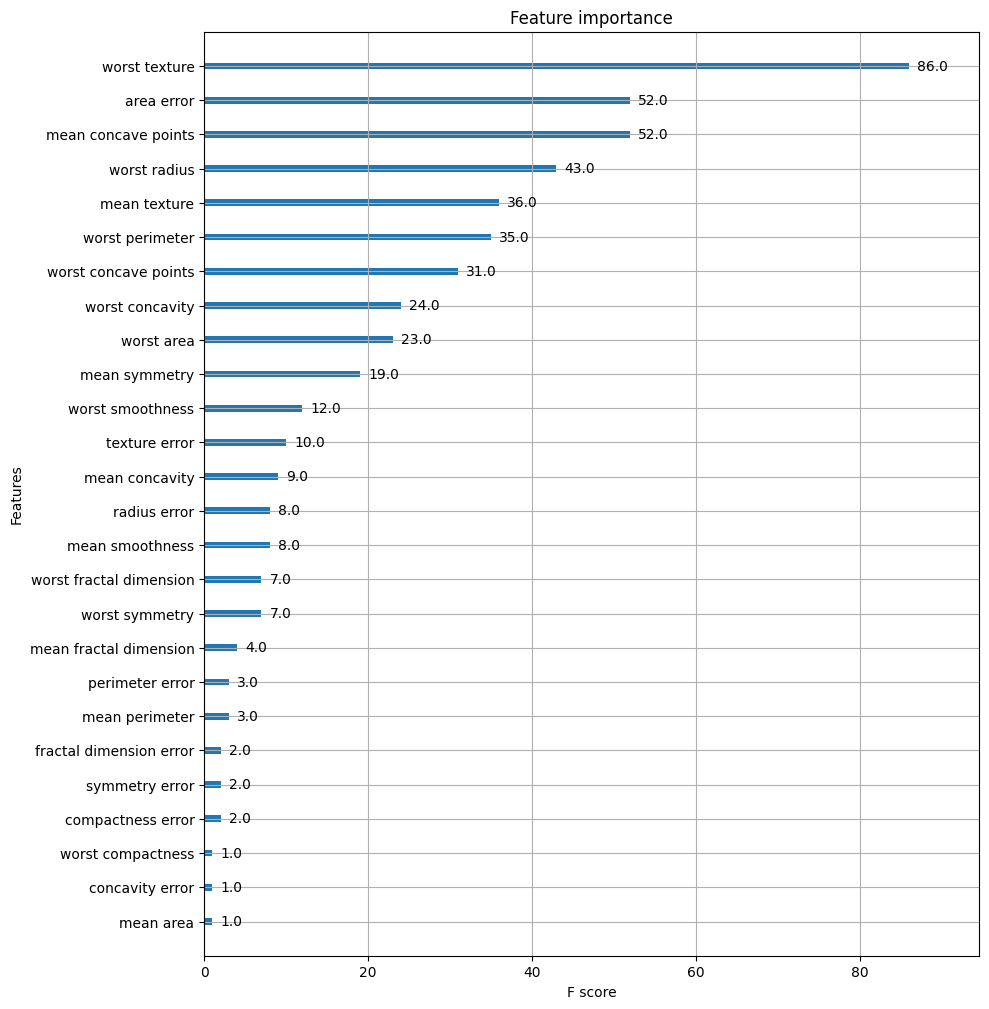

In [80]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방.
plot_importance(xgb_wrapper, ax=ax)